In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats # used to plot qqplot
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/content/train.csv',usecols = ['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum() # hmare age wale clm me kch missing values hai to unko fill krenge by mean values

,0
Survived,0
Age,177
Fare,0


In [6]:
df['Age'].fillna(df['Age'].mean(),inplace =True)

<ipython-input-6-59932f0886b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace =True)


In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum() #Ab koi missing values nhi hai

,0
Survived,0
Age,0
Fare,0


In [9]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

<ipython-input-11-28976805a137>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


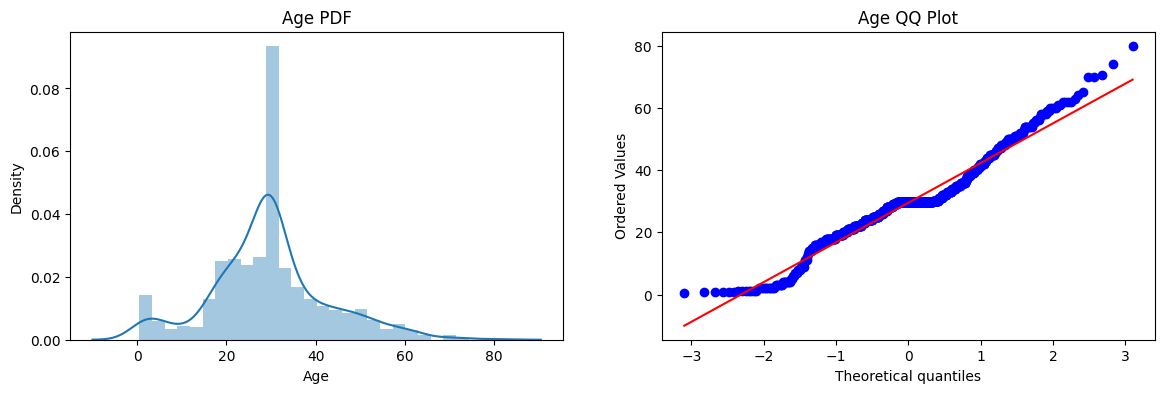

In [11]:
#Now we will plot age and fare and check if these are normally distributed or not
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist = 'norm',plot = plt)
plt.title('Age QQ Plot')
plt.show()

<ipython-input-12-5fd7972f9032>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


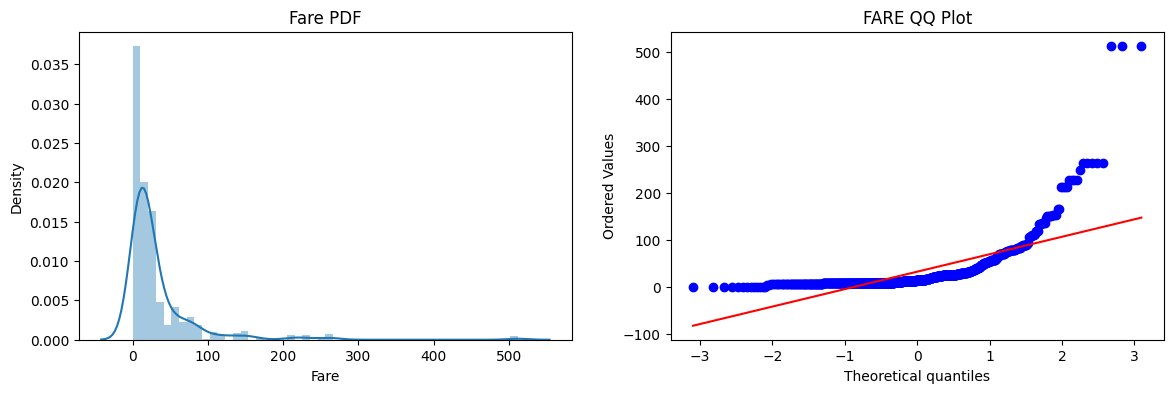

In [12]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist = 'norm',plot = plt)
plt.title('FARE QQ Plot')
plt.show()

In [13]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [14]:
# fitting x_train and y_train pe ar accuracy score nikal rha hu
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [15]:
# if i am applying log tranform on both clm to kya fayda hoga ..?..
trf = FunctionTransformer(func = np.log1p) #log simply log apply krta hai but agr 0 hai to gdbd ho jayega but np.log1 phle 1 add krta hai to koi gdbd nhi hogi

In [16]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [17]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [19]:
x_transformed = trf.fit_transform(x)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring = 'accuracy',cv = 10)))
print('DT',np.mean(cross_val_score(clf2,x_transformed,y,scoring = 'accuracy',cv = 10)))

LR 0.678027465667915
DT 0.6588639200998752


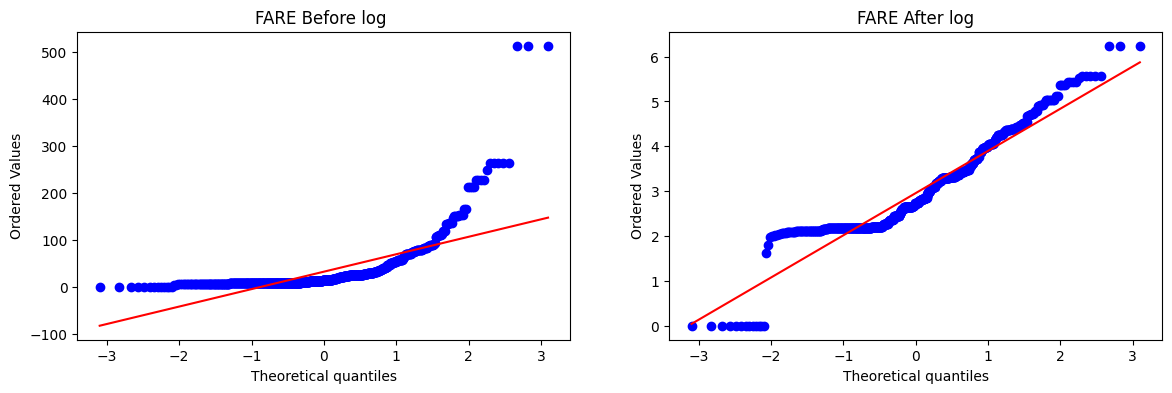

In [21]:
# Now we will plot FARE before and after log to see the changes
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist = 'norm',plot = plt)
plt.title('FARE Before log ')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist = 'norm',plot = plt)
plt.title('FARE After log')
plt.show()

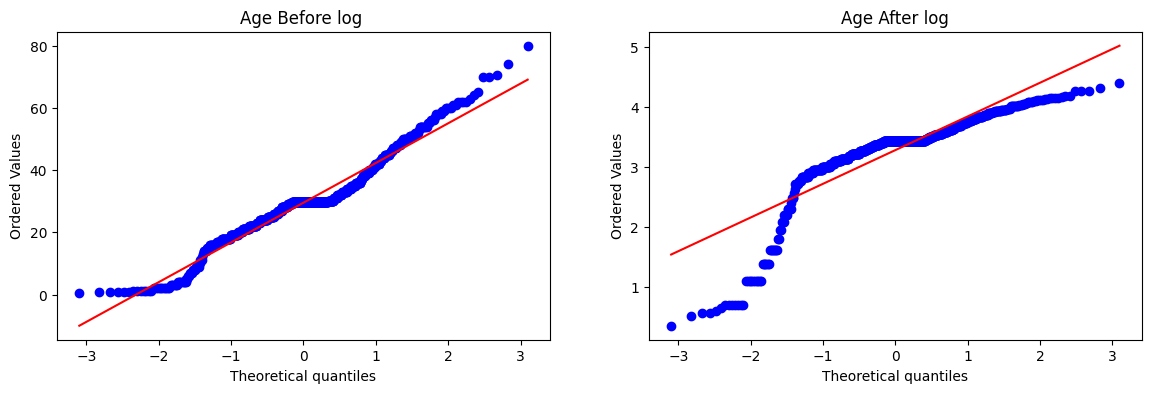

In [22]:
# Now we will plot AGE before and after log to see the changes
plt.figure(figsize = (14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist = 'norm',plot = plt)
plt.title('Age Before log ')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist = 'norm',plot = plt)
plt.title('Age After log')
plt.show()

In [23]:
# Here we se that phle ye jyada accha tha ab aye kharab ho gya

In [25]:
# Now we will do rather than applying log transform on both of columns we will apply onlu on fare
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder = 'passthrough')
x_train_transformed2= trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [26]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred1 = clf2.predict(x_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6871508379888268


In [29]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577153558052434


In [30]:
"""Summary me ye smjh aaya hme ki yha pe jo data tha usme age already normally distributed tha almost Fare right skew tha to jb maine
FAre ke upr log transform lgake fir se logistic regression lgaya to hmara result improve kr gya 2nd observation kya hai hum sath hi
sath ek ar algorithm ko lekr chl rhe the that was decision tree ae decision tree ke upr kch bhi fark nhi pda ecision tree ka resilt jaisa suru
me tha waisa hi transformation ke baad tha kyki decisio tree is one of those algorithm jisko frk nhi pdta ki uske data ka distributuon kya hai linear
regression and logistic regression is one of those algorithms jinko frk pdta hai """

'Summary me ye smjh aaya hme ki yha pe jo data tha usme age already normally distributed tha almost Fare right skew tha to jb maine \nFAre ke upr log transform lgake fir se logistic regression lgaya to hmara result improve kr gya 2nd observation kya hai hum sath hi \nsath ek ar algorithm ko lekr chl rhe the that was decision tree ae decision tree ke upr kch bhi fark nhi pda ecision tree ka resilt jaisa suru \nme tha waisa hi transformation ke baad tha kyki decisio tree is one of those algorithm jisko frk nhi pdta ki uske data ka distributuon kya hai linear \nregression and logistic regression is one of those algorithms jinko frk pdta hai '

In [31]:
# yha pe hmne 1 fn likh jisme hm fn pass krenge to ye 2 chije bna ke dega phla accuracy calculate kke dega
#2nd aapko ye btayega aapka qq plot phle ar baad me kaise tha
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy 0.6589013732833957


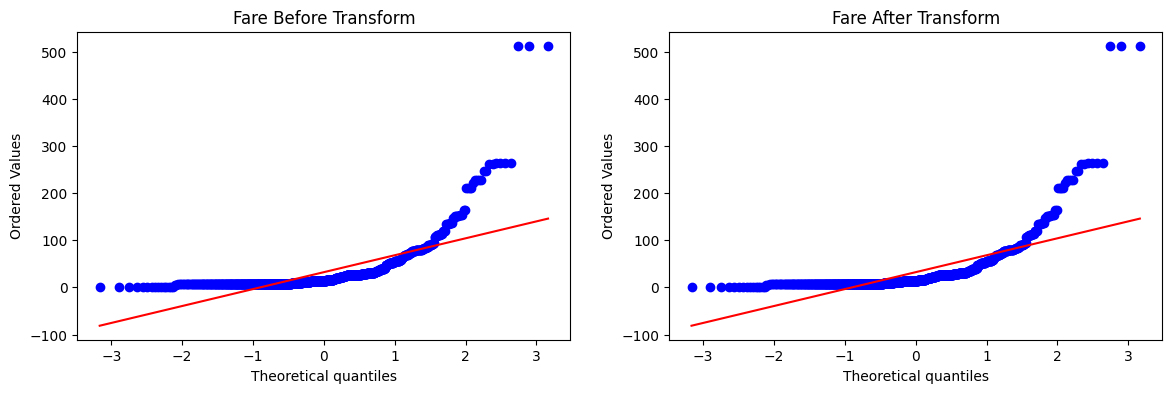

In [32]:
apply_transform(lambda x : x)

Accuracy 0.6431335830212235


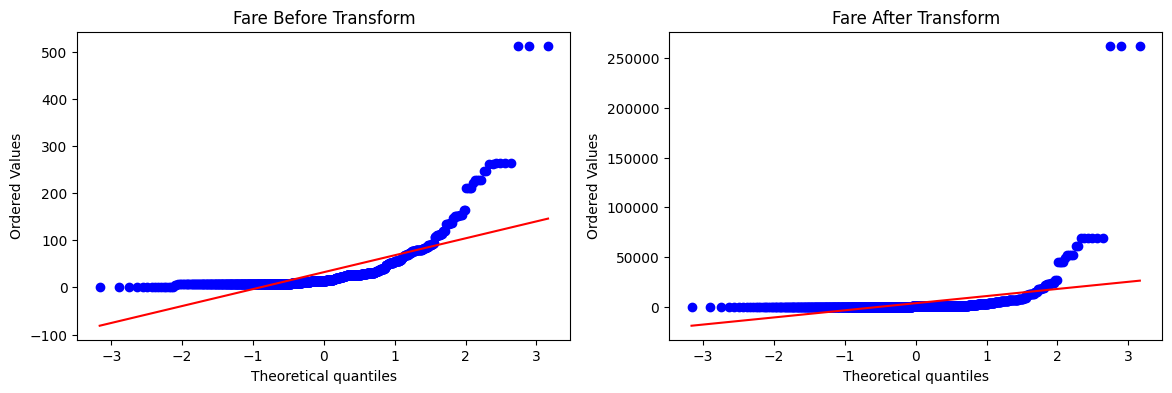

In [33]:
apply_transform(lambda x : x**2)

Accuracy 0.6262796504369538


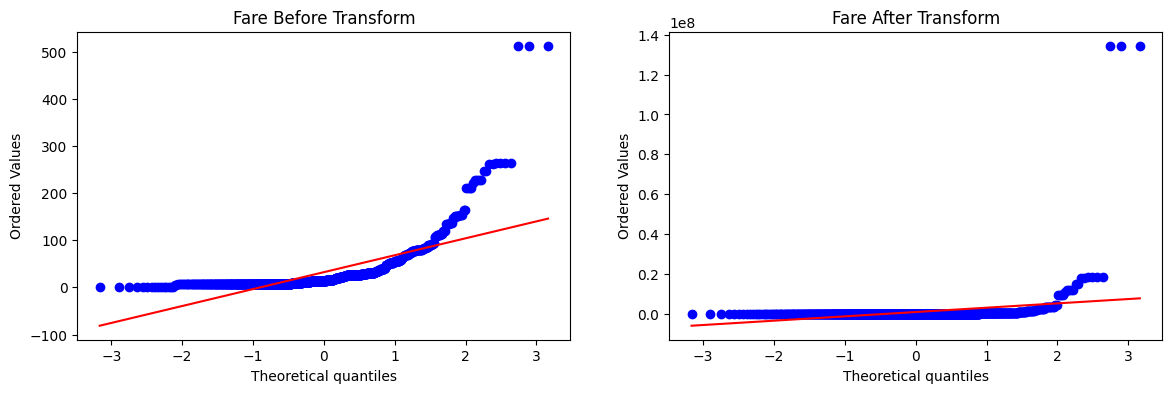

In [35]:
apply_transform(lambda x : x**3)

Accuracy 0.6611485642946316


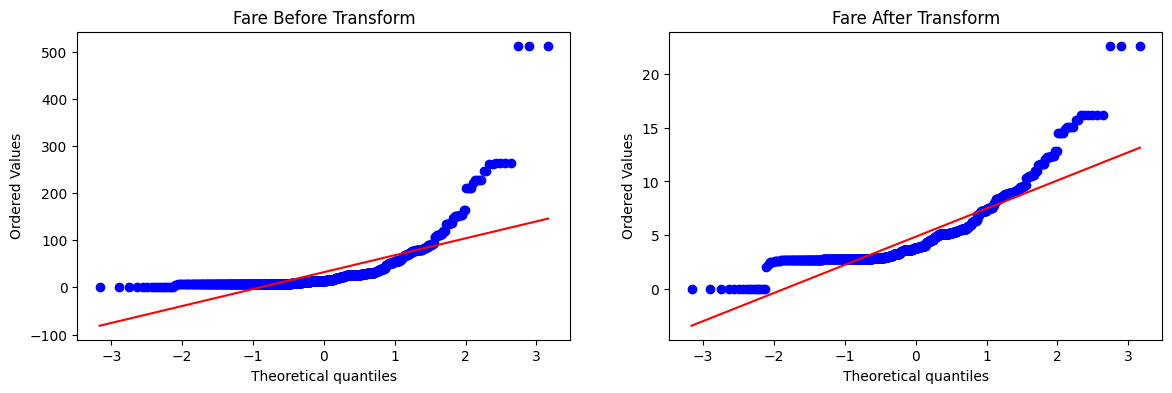

In [36]:
apply_transform(lambda x : x**(1/2))

Accuracy 0.61729088639201


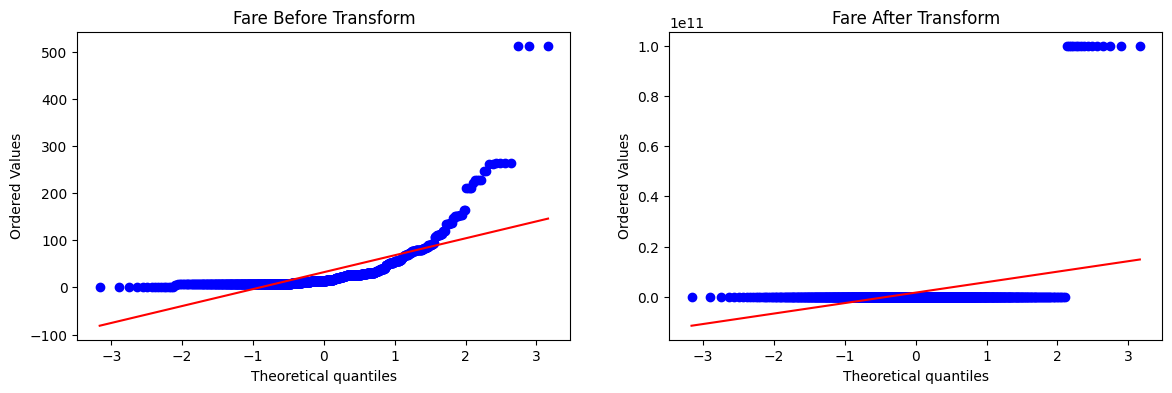

In [40]:
apply_transform(lambda x : (1/(x+0.00000000001)))

Accuracy 0.6195131086142323


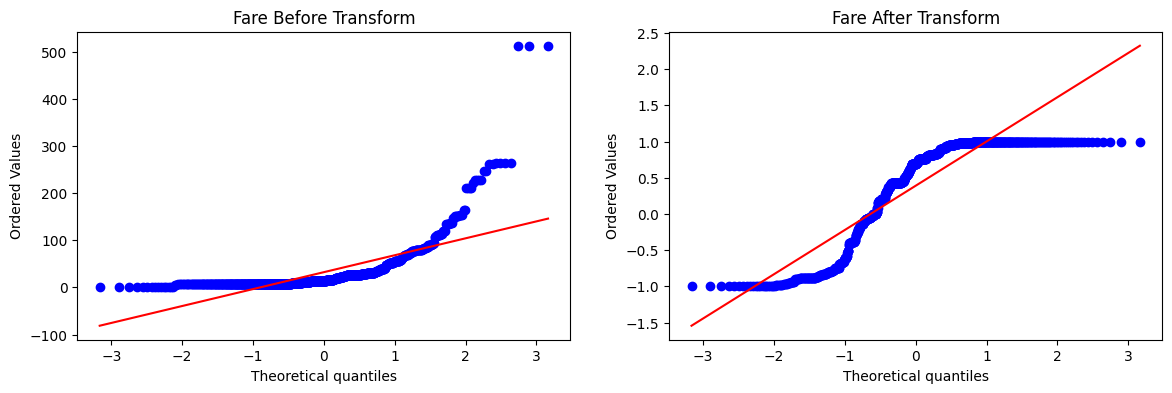

In [41]:
apply_transform(lambda x : np.sin(x))